In [8]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv("Courses.csv")

# Display the first few rows to understand the structure
print(data.head())


                    course_id       userid_DI  registered  viewed  explored  \
0  HarvardX/CB22x/2013_Spring  MHxPC130442623           1       0         0   
1         HarvardX/CS50x/2012  MHxPC130442623           1       1         0   
2  HarvardX/CB22x/2013_Spring  MHxPC130275857           1       0         0   
3         HarvardX/CS50x/2012  MHxPC130275857           1       0         0   
4  HarvardX/ER22x/2013_Spring  MHxPC130275857           1       0         0   

   certified final_cc_cname_DI LoE_DI  YoB gender grade start_time_DI  \
0          0     United States    NaN  NaN    NaN     0    2012-12-19   
1          0     United States    NaN  NaN    NaN     0    2012-10-15   
2          0     United States    NaN  NaN    NaN     0    2013-02-08   
3          0     United States    NaN  NaN    NaN     0    2012-09-17   
4          0     United States    NaN  NaN    NaN     0    2012-12-19   

  last_event_DI  nevents  ndays_act  nplay_video  nchapters  nforum_posts  \
0    2013

In [10]:
# Check column names
print(data.columns)

# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)

# Check for duplicates
print(data.duplicated().sum())


Index(['course_id', 'userid_DI', 'registered', 'viewed', 'explored',
       'certified', 'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender', 'grade',
       'start_time_DI', 'last_event_DI', 'nevents', 'ndays_act', 'nplay_video',
       'nchapters', 'nforum_posts', 'roles', 'incomplete_flag'],
      dtype='object')
course_id                 0
userid_DI                 0
registered                0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI               106008
YoB                   96605
gender                86806
grade                 48372
start_time_DI             0
last_event_DI        178954
nevents              199151
ndays_act            162743
nplay_video          457530
nchapters            258753
nforum_posts              0
roles                641138
incomplete_flag      540977
dtype: int64
course_id             object
userid_DI             object
registered             int64
viewed                 int6

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   course_id          641138 non-null  object 
 1   userid_DI          641138 non-null  object 
 2   registered         641138 non-null  int64  
 3   viewed             641138 non-null  int64  
 4   explored           641138 non-null  int64  
 5   certified          641138 non-null  int64  
 6   final_cc_cname_DI  641138 non-null  object 
 7   LoE_DI             535130 non-null  object 
 8   YoB                544533 non-null  float64
 9   gender             554332 non-null  object 
 10  grade              592766 non-null  object 
 11  start_time_DI      641138 non-null  object 
 12  last_event_DI      462184 non-null  object 
 13  nevents            441987 non-null  float64
 14  ndays_act          478395 non-null  float64
 15  nplay_video        183608 non-null  float64
 16  nc

In [7]:
print(data.describe())

       registered         viewed       explored      certified            YoB  \
count    641138.0  641138.000000  641138.000000  641138.000000  544533.000000   
mean          1.0       0.624299       0.061899       0.027587    1985.253279   
std           0.0       0.484304       0.240973       0.163786       8.891814   
min           1.0       0.000000       0.000000       0.000000    1931.000000   
25%           1.0       0.000000       0.000000       0.000000    1982.000000   
50%           1.0       1.000000       0.000000       0.000000    1988.000000   
75%           1.0       1.000000       0.000000       0.000000    1991.000000   
max           1.0       1.000000       1.000000       1.000000    2013.000000   

             nevents      ndays_act    nplay_video      nchapters  \
count  441987.000000  478395.000000  183608.000000  382385.000000   
mean      431.008018       5.710254     114.844173       3.634423   
std      1516.116057      11.866471     426.996844       4.4909

In [14]:
# Count unique students
n_unique_students = data['userid_DI'].nunique()

# Or alternatively, if you want to see the unique values:
#unique_students = df['userid_DI'].unique()

print(f"Number of unique students: {n_unique_students}")


Number of unique students: 476532


In [16]:
# Count unique course
n_unique_courses = data['course_id'].nunique()

print(f"Number of unique courses: {n_unique_courses}")

Number of unique courses: 16


In [16]:
import pandas as pd

# Count courses per student
courses_per_student = data.groupby('userid_DI').size()

# Calculate average
average_courses = courses_per_student.mean()

# Print results
print(f"Total number of unique students: {len(courses_per_student)}")
print(f"Average number of courses per student: {average_courses:.2f}")

# see distribution
print("\nDistribution of courses per student:")
print(courses_per_student.value_counts().sort_index())


Total number of unique students: 476532
Average number of courses per student: 1.35

Distribution of courses per student:
1     364822
2      78269
3      21982
4       7171
5       2643
6        900
7        334
8        132
9         93
10        42
11        40
12        28
13        15
14        24
15        17
16        20
Name: count, dtype: int64


In [2]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


Total number of unique students: 476532
Average number of courses per student: 1.35

Distribution of courses per student:
1     364822
2      78269
3      21982
4       7171
5       2643
6        900
7        334
8        132
9         93
10        42
11        40
12        28
13        15
14        24
15        17
16        20
Name: count, dtype: int64


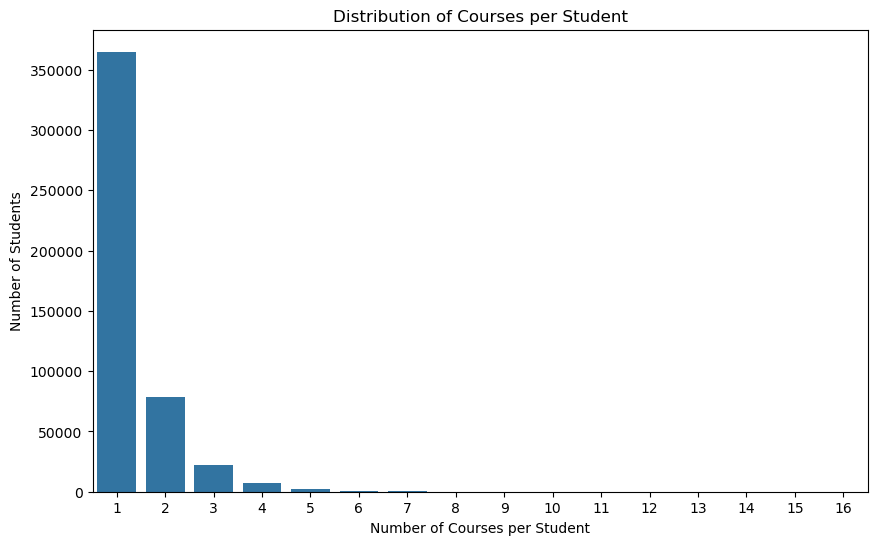

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count courses per student
courses_per_student = data.groupby('userid_DI').size()

# Calculate average
average_courses = courses_per_student.mean()

# Print results
print(f"Total number of unique students: {len(courses_per_student)}")
print(f"Average number of courses per student: {average_courses:.2f}")

# See distribution
print("\nDistribution of courses per student:")
print(courses_per_student.value_counts().sort_index())

# Plot distribution using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x=courses_per_student)

plt.xlabel('Number of Courses per Student')
plt.ylabel('Number of Students')
plt.title('Distribution of Courses per Student')

plt.show()


In [18]:

import numpy as np

# 1. Remove specified columns
columns_to_remove = ['viewed', 'explored', 'nplay_video', 'incomplete_flag', 'roles']
df_cleaned = data.drop(columns=columns_to_remove)

# 2. Handle missing values
# For categorical variables (LoE_DI and gender) - impute with mode
df_cleaned['LoE_DI'] = df_cleaned['LoE_DI'].fillna(df_cleaned['LoE_DI'].mode()[0])
df_cleaned['gender'] = df_cleaned['gender'].fillna(df_cleaned['gender'].mode()[0])

# For YoB - impute with median
df_cleaned['YoB'] = df_cleaned['YoB'].fillna(df_cleaned['YoB'].median())

# 3. Drop rows with missing grades
df_cleaned = df_cleaned.dropna(subset=['grade'])

# 4. Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Print summary of the changes
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", df_cleaned.shape)
print("\nMissing values in cleaned dataset:")
print(df_cleaned.isnull().sum())


Original dataset shape: (641138, 20)
Cleaned dataset shape: (592766, 15)

Missing values in cleaned dataset:
course_id                 0
userid_DI                 0
registered                0
certified                 0
final_cc_cname_DI         0
LoE_DI                    0
YoB                       0
gender                    0
grade                     0
start_time_DI             0
last_event_DI        169903
nevents              188443
ndays_act            156092
nchapters            236771
nforum_posts              0
dtype: int64


In [15]:

import numpy as np



# 1. Remove specified columns
columns_to_remove = ['viewed', 'explored', 'nplay_video', 'incomplete_flag', 'roles']
df_cleaned = data.drop(columns=columns_to_remove)

# 2. Handle missing values
# For categorical variables (LoE_DI and gender) - impute with mode
df_cleaned['LoE_DI'] = df_cleaned['LoE_DI'].fillna(df_cleaned['LoE_DI'].mode()[0])
df_cleaned['gender'] = df_cleaned['gender'].fillna(df_cleaned['gender'].mode()[0])

# For YoB - impute with median
df_cleaned['YoB'] = df_cleaned['YoB'].fillna(df_cleaned['YoB'].median())

# 3. Drop rows with missing grades
df_cleaned = df_cleaned.dropna(subset=['grade'])

# 4. Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Print summary of the changes
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", df_cleaned.shape)
print("\nMissing values in cleaned dataset:")
print(df_cleaned.isnull().sum())


Original dataset shape: (641138, 20)
Cleaned dataset shape: (592766, 15)

Missing values in cleaned dataset:
course_id                 0
userid_DI                 0
registered                0
certified                 0
final_cc_cname_DI         0
LoE_DI                    0
YoB                       0
gender                    0
grade                     0
start_time_DI             0
last_event_DI        169903
nevents              188443
ndays_act            156092
nchapters            236771
nforum_posts              0
dtype: int64


In [19]:
# Convert date columns to datetime
#df_cleaned['start_time_DI'] = df_cleaned.to_datetime(data['start_time_DI'])
#df_cleaned['last_event_DI'] = df_cleaned.to_datetime(data['last_event_DI'])

# Convert boolean columns
#boolean_columns = ['registered', 'viewed', 'explored', 'certified', 'incomplete_flag']
#data[boolean_columns] = data[boolean_columns].astype(bool)


AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [21]:
# Calculate age
df_cleaned['age'] = 2024 - df_cleaned['YoB']

# Calculate engagement ratio
df_cleaned['engagement_ratio'] =df_cleaned['nevents'] / df_cleaned['ndays_act']

df_cleaned.to_csv('cleaned_dataset.csv', index=False)
print(df_cleaned.head())

                    course_id       userid_DI  registered  certified  \
0  HarvardX/CB22x/2013_Spring  MHxPC130442623           1          0   
1         HarvardX/CS50x/2012  MHxPC130442623           1          0   
2  HarvardX/CB22x/2013_Spring  MHxPC130275857           1          0   
3         HarvardX/CS50x/2012  MHxPC130275857           1          0   
4  HarvardX/ER22x/2013_Spring  MHxPC130275857           1          0   

  final_cc_cname_DI      LoE_DI     YoB gender grade start_time_DI  \
0     United States  Bachelor's  1988.0      m     0    2012-12-19   
1     United States  Bachelor's  1988.0      m     0    2012-10-15   
2     United States  Bachelor's  1988.0      m     0    2013-02-08   
3     United States  Bachelor's  1988.0      m     0    2012-09-17   
4     United States  Bachelor's  1988.0      m     0    2012-12-19   

  last_event_DI  nevents  ndays_act  nchapters  nforum_posts   age  \
0    2013-11-17      NaN        9.0        NaN             0  36.0   
1     